# Week 5 Lab: Supervised Learning

This week's assignment will focus completeing a KNN analysis and comparing its performance with other supervised algorithms.


## Our Dataset: 
**Dataset:** bank-additional-full.csv (Provided in folder assign_wk5)

Remember to take a look at the bank-additional-names.txt files for a better understanding of the dataset.


# Assignment Requirements

## Part 1: KNN Analysis
**Objective:** According to the dataset's text file, the target column the last column in the dataset.
   - Cleanup the dataset as you deem appropriate. As always, defend your reasoning!!!
       - Missing values?
       - Column names
   - Prepare the data for machine learning
       - A little EDA goes a long way
       - Do you need to do anything about data types?
   - KNN analysis
       - What is your objective from the analysis?
       - What is your optimal K? 
       - How about accuracy rate? 
    - Discover any insights from this analysis? 
       - Include numbers/graphs corresponding to your conclusions
       - Discuss ways to improve the performance of your KNN model 
       - Defend and backup your thoughts!!!!!!

## Part 2: Comparison to other supervised algorithm
As we saw in the lecture notebook, algorithm performance varies based on the algorithm used. The lecture demostrated using K-Fold Cross-Validation to compare the performance of several algorithm for the same dataset. 
   - At the end of part 1 you discussed ways to improve the performance of you KNN model. 
       - Implement one of those methods to improve your KNN model performance.
       - Rerun a KNN analysis for your improved dataset
       - Discuss the change in performance from the model in part 1
   - Complete a K-fold cross-validation analysis for your improved model
       - You need to use at less three additional models
       - Discuss the difference in the performance of the 4 algorithms against your improved dataset.

## I. Introduction

This weeks analysis is on a dataset with bank customer details, marketing campaign interactions and responses, other details about marketing, social/economic context, and our output as to whether a specific client has subscribed to term deposit.

The datasets for this week are provided in bank-additional-full.csv and is describe in Attribute Information.

## II. Methods/Code, III. Results/Output, IV. Analysis of Results

### Setup
---

In [94]:
%matplotlib inline

import pandas as pd
import numpy as np
from scipy import stats

from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

import matplotlib.pylab as plt
import seaborn as sns
import phik

In [2]:
!head assign_wk5/bank-additional-full.csv

In [3]:
!head assign_wk5/bank-additional-names.txt

*Below is information used directly from bank-additional-names.txt for understanding the columns and goal of the dataset*

### Attribute information:

   For more information, read [Moro et al., 2014].

#### Input variables:
   ##### Bank client data:
   1. age (numeric)
   2. job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")
   3. marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)
   4. education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")
   5. default: has credit in default? (categorical: "no","yes","unknown")
   6. housing: has housing loan? (categorical: "no","yes","unknown")
   7. loan: has personal loan? (categorical: "no","yes","unknown")
   
##### Related with the last contact of the current campaign:
   8. contact: contact communication type (categorical: "cellular","telephone")
   9. month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
   10. day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")
   11. duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
   
##### Other attributes:
   12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
   13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
   14. previous: number of contacts performed before this campaign and for this client (numeric)
   15. poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")
   
##### Social and economic context attributes
   16. emp.var.rate: employment variation rate - quarterly indicator (numeric)
   17. cons.price.idx: consumer price index - monthly indicator (numeric)     
   18. cons.conf.idx: consumer confidence index - monthly indicator (numeric)     
   19. euribor3m: euribor 3 month rate - daily indicator (numeric)
   20. nr.employed: number of employees - quarterly indicator (numeric)

##### Output variable (desired target):
   21. y: has the client subscribed a term deposit? (binary: "yes","no")

### Missing Attribute Values:
There are several missing values in some categorical attributes, all coded with the "unknown" label. These missing values can be treated as a possible class label or using deletion or imputation techniques. 


In [4]:
bank_df = pd.read_csv('assign_wk5/bank-additional-full.csv', sep=';')
bank_df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [5]:
bank_df.shape

(41188, 21)

In [6]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [7]:
bank_df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [8]:
bank_df['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [9]:
bank_df['marital'].value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

In [10]:
bank_df['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [11]:
bank_df['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [12]:
bank_df['housing'].value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

In [13]:
bank_df['loan'].value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

In [14]:
bank_df['contact'].value_counts()

cellular     26144
telephone    15044
Name: contact, dtype: int64

In [15]:
bank_df['month'].value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

In [16]:
bank_df['day_of_week'].value_counts()

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64

In [17]:
bank_df['poutcome'].value_counts()

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

In [18]:
bank_df['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

### Data Cleanup
***

The first part of our data cleanup will be to handle the missing values, which are being categorized as unknown for some of our categorical variables. My rationale is that if the column is not correlated to our output column 'y' then we can delete it, however if it is we should determine an imputation strategy.

In [19]:
# Function and test are adapted from the example:
# https://thinkingneuron.com/how-to-measure-the-correlation-between-two-categorical-variables-in-python/

def chi2_corr_results(col, target):
    print(f'The null hypothesis is that {col} and {target} are not related')
    alpha = 0.05
    xtab_result = pd.crosstab(index=bank_df[col], columns=bank_df[target])
    chi2_result = stats.chi2_contingency(xtab_result)
    print(f'The P-Value of the ChiSq Test is: {chi2_result[1]}')
    if alpha > chi2_result[1]:
        print(f'Reject the null hypothesis {col} and {target} are likely related')
    else:
        print(f'Accept the null hypothesis {col} and {target} are unrelated')

In [20]:
bank_df[bank_df['job'] == 'unknown'].shape

(330, 21)

In [21]:
chi2_corr_results('job', 'y')

The null hypothesis is that job and y are not related
The P-Value of the ChiSq Test is: 4.189763287563623e-199
Reject the null hypothesis job and y are likely related


It appears that these are likely to be correlated, so we can either find an imputation strategy or drop the records that are unknown.

In [22]:
# Percent of records affected if we drop the unknowns

bank_df[bank_df['job'] == 'unknown'].shape[0] / bank_df.shape[0] * 100

0.8012042342429834

It looks like 0.8% of records have this unknown value for job, and given the variety of options for this category giving these records the mode value seems erroneous. We will drop them from our dataset, due to the rarity and distribution of possible categories that the unknown value should be.

In [23]:
# Drop unknown job records

bank_df = bank_df[bank_df['job'] != 'unknown']

In [24]:
bank_df[bank_df['job'] == 'unknown'].shape

(0, 21)

In [25]:
bank_df[bank_df['marital'] == 'unknown'].shape

(71, 21)

In [26]:
chi2_corr_results('marital', 'y')

The null hypothesis is that marital and y are not related
The P-Value of the ChiSq Test is: 3.5511513173461614e-25
Reject the null hypothesis marital and y are likely related


It appears that these are likely to be correlated, so we can either find an imputation strategy or drop the records that are unknown.

In [27]:
bank_df[bank_df['marital'] == 'unknown'].shape[0] / bank_df.shape[0] * 100

0.17377257819766018

It is a very small subset of our data, and only has three possible categories. In this case I am going to impute the data to the mode value.

In [28]:
bank_df.loc[bank_df['marital'] == 'unknown', 'marital'] = bank_df['marital'].mode()[0]

In [29]:
bank_df[bank_df['marital'] == 'unknown'].shape

(0, 21)

In [30]:
bank_df[bank_df['education'] == 'unknown'].shape

(1600, 21)

In [31]:
chi2_corr_results('education', 'y')

The null hypothesis is that education and y are not related
The P-Value of the ChiSq Test is: 4.197220471383547e-37
Reject the null hypothesis education and y are likely related


In [32]:
bank_df[bank_df['education'] == 'unknown'].shape[0] / bank_df.shape[0] * 100

3.9160017622007928

In [33]:
bank_df['education'].value_counts()

university.degree      12123
high.school             9478
basic.9y                6014
professional.course     5231
basic.4y                4124
basic.6y                2270
unknown                 1600
illiterate                18
Name: education, dtype: int64

Education seems to be our first imputation hurdle with seven categories, and effecting just under four percent of our records. Dropping them seems like a lot of lost data, so we will impute with the mode for now.

In [34]:
bank_df.loc[bank_df['education'] == 'unknown', 'education'] = bank_df['education'].mode()[0]

In [35]:
bank_df[bank_df['education'] == 'unknown'].shape

(0, 21)

In [36]:
bank_df[bank_df['default'] == 'unknown'].shape

(8445, 21)

In [37]:
chi2_corr_results('default', 'y')

The null hypothesis is that default and y are not related
The P-Value of the ChiSq Test is: 5.801613261933182e-87
Reject the null hypothesis default and y are likely related


In [38]:
bank_df[bank_df['default'] == 'unknown'].shape[0] / bank_df.shape[0] * 100

20.66914680111606

In [39]:
bank_df['default'].value_counts()

no         32410
unknown     8445
yes            3
Name: default, dtype: int64

At first default looks to be our most difficult unknown yet affecting more than twenty percent of records. Thankfully, we have only three instances of yes, with the remainder being no or unknown. This appears to be a fairly safe column for using the mode as our imputation.

In [40]:
bank_df.loc[bank_df['default'] == 'unknown', 'default'] = bank_df['default'].mode()[0]

In [41]:
bank_df[bank_df['default'] == 'unknown'].shape

(0, 21)

In [42]:
bank_df[bank_df['housing'] == 'unknown'].shape

(985, 21)

In [43]:
chi2_corr_results('housing', 'y')

The null hypothesis is that housing and y are not related
The P-Value of the ChiSq Test is: 0.06484744504506873
Accept the null hypothesis housing and y are unrelated


In [44]:
# The housing variable appears to be unrelated, so we should be safe to drop this column from our calculations

bank_df.drop(columns='housing', inplace=True)

/tmp/ipykernel_4193/1400972830.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bank_df.drop(columns='housing', inplace=True)


In [45]:
bank_df[bank_df['loan'] == 'unknown'].shape

(985, 20)

In [46]:
chi2_corr_results('loan', 'y')

The null hypothesis is that loan and y are not related
The P-Value of the ChiSq Test is: 0.6264046714118042
Accept the null hypothesis loan and y are unrelated


In [47]:
# The loan variable appears to be unrelated, so we should be safe to drop this column from our calculations

bank_df.drop(columns='loan', inplace=True)

/tmp/ipykernel_4193/3428934776.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bank_df.drop(columns='loan', inplace=True)


### EDA and Data Preparation
***

Starting our EDA on the bank data we will start looking at a correlation heatmap to see how our columns relate.

<AxesSubplot:>

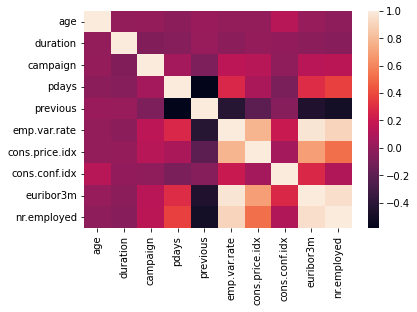

In [48]:
sns.heatmap(bank_df.corr())

interval columns not set, guessing: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


<AxesSubplot:>

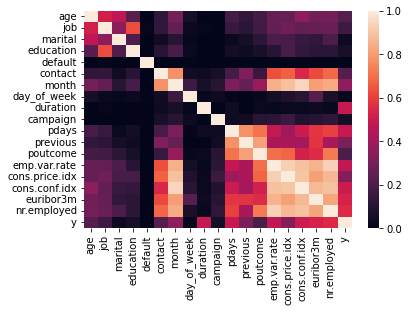

In [49]:
sns.heatmap(bank_df.phik_matrix())

<AxesSubplot:>

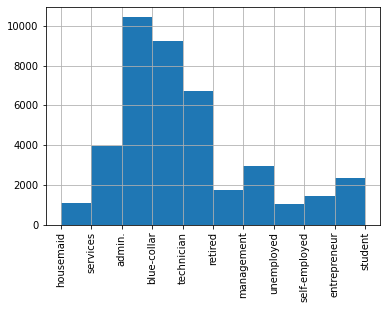

In [50]:
bank_df['job'].hist(xrot=90)

<AxesSubplot:>

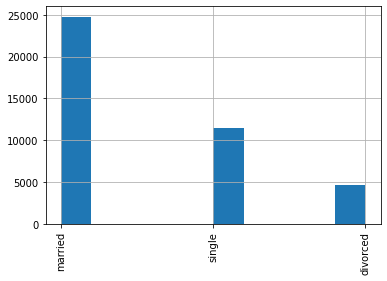

In [51]:
bank_df['marital'].hist(xrot=90)

<AxesSubplot:>

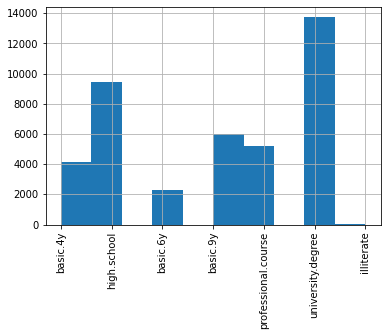

In [52]:
bank_df['education'].hist(xrot=90)

<AxesSubplot:>

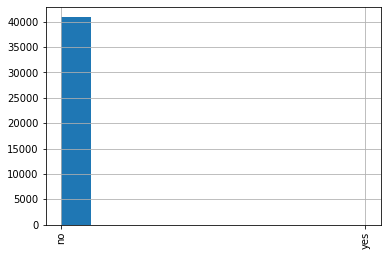

In [53]:
bank_df['default'].hist(xrot=90)

<AxesSubplot:>

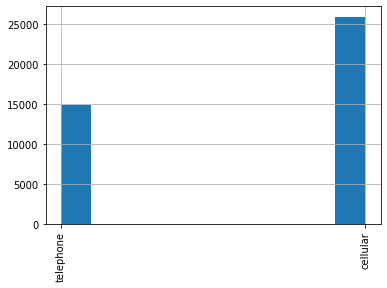

In [54]:
bank_df['contact'].hist(xrot=90)

<AxesSubplot:>

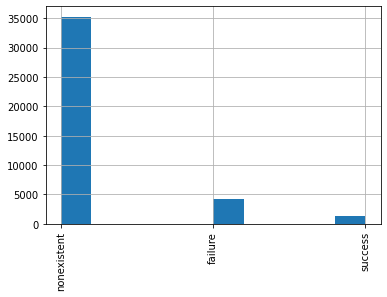

In [55]:
bank_df['poutcome'].hist(xrot=90)

<AxesSubplot:>

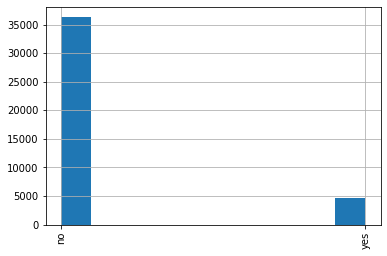

In [56]:
bank_df['y'].hist(xrot=90)

In [112]:
# Balance of no's to all observations

niave_acc = bank_df[bank_df['y'] == 'no'].shape[0] / bank_df.shape[0] * 100
niave_acc

88.7341524303686

In [109]:
# Balance of yes's to all observations

bank_df[bank_df['y'] == 'yes'].shape[0] / bank_df.shape[0] * 100

11.265847569631408

It looks like a niave classifier of just labeling all records as 'no' would give us almost 89% accuracy, so the important portion of our classifiers will be the True Positive, False Positive, and False Negative values.

In [57]:
bank_df.phik_matrix()['y']

interval columns not set, guessing: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


age               0.221498
job               0.159344
marital           0.031885
education         0.062134
default           0.000000
contact           0.225353
month             0.357649
day_of_week       0.018395
duration          0.489429
campaign          0.052752
pdays             0.490161
previous          0.313000
poutcome          0.196131
emp.var.rate      0.474536
cons.price.idx    0.335440
cons.conf.idx     0.500681
euribor3m         0.529803
nr.employed       0.546918
y                 1.000000
Name: y, dtype: float64

We also took one last look at our correlation to our output before we encode our categorical values.

### Part 1: KNN Analysis
***

- **What is your objective from the analysis?**

The objective of this analysis is to see how well we can predict the values of the y column with our given inputs. This will be done by encoding our categorical variables, splitting out a our test and train data, and running KNN classification against it.

In [58]:
# Encoding our categorical data
# The steps we follow here are adapted from 
# https://worldclass.regis.edu/d2l/le/content/285076/viewContent/4152301/View

cat_columns = ['job', 'marital', 'education', 'default', 'contact', 'poutcome', 'month', 'day_of_week']

bank_encoded = pd.get_dummies(bank_df, columns=cat_columns, prefix=cat_columns)
bank_encoded

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,0,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,0,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,0,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,0,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,1,0,0,1,0,0,0,0
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,1,0,0,1,0,0,0,0
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,1,0,0,1,0,0,0,0
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,1,0,0,1,0,0,0,0


In [59]:
bank_encoded.shape

(40858, 54)

In [60]:
bank_encoded.loc[bank_encoded['y'] == 'no', 'y'] = 0
bank_encoded.loc[bank_encoded['y'] == 'yes', 'y'] = 1

In [61]:
bank_encoded['y'] = pd.to_numeric(bank_encoded['y'])

In [62]:
# Move our y column to the end of the dataframe

bank_encoded = bank_encoded[[c for c in bank_encoded if c not in ['y']] + ['y']]

In [63]:
X = bank_encoded.copy()
X.drop(columns=['y'], inplace=True)
y = bank_encoded['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
X_train

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
14200,29,138,3,999,0,1.4,93.918,-42.7,4.962,5228.1,...,0,0,0,0,0,0,1,0,0,0
4590,29,110,2,999,0,1.1,93.994,-36.4,4.856,5191.0,...,0,1,0,0,0,0,0,0,1,0
4308,31,110,1,999,0,1.1,93.994,-36.4,4.856,5191.0,...,0,1,0,0,0,0,0,0,1,0
7369,35,65,7,999,0,1.1,93.994,-36.4,4.864,5191.0,...,0,1,0,0,0,1,0,0,0,0
31570,28,203,1,999,0,-1.8,92.893,-46.2,1.327,5099.1,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6348,24,112,4,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,0,0,1,0
11423,38,124,1,999,0,1.4,94.465,-41.8,4.959,5228.1,...,0,0,0,0,0,1,0,0,0,0
38463,37,93,1,999,0,-3.4,92.431,-26.9,0.730,5017.5,...,0,0,0,1,0,1,0,0,0,0
876,44,786,1,999,0,1.1,93.994,-36.4,4.856,5191.0,...,0,1,0,0,0,0,0,0,0,1


In [65]:
scores = []

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
scores.append(model.score(X_test, y_test))

scores
pred = model.predict(X_test)
accuracy_score(pred, y_test)

0.9050416054821341

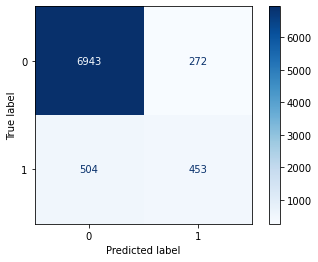

In [66]:
plot_confusion_matrix(model, X_test, y_test, cmap='Blues')

- **What is your optimal K?**

In order to find our optimal K we will iterate through our n_neighbors tuning parameter to see where our best accuracy scores occur.

In [67]:
scores = []
# remember the ending number for range is not inclusive
for k in range(2, 54):
    # output to let us know where we are
    print(f'Evaluating {k} clusters')
    
    # n_jobs=-1 will use all processors on your system
    model = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

Evaluating 2 clusters
Evaluating 3 clusters
Evaluating 4 clusters
Evaluating 5 clusters
Evaluating 6 clusters
Evaluating 7 clusters
Evaluating 8 clusters
Evaluating 9 clusters
Evaluating 10 clusters
Evaluating 11 clusters
Evaluating 12 clusters
Evaluating 13 clusters
Evaluating 14 clusters
Evaluating 15 clusters
Evaluating 16 clusters
Evaluating 17 clusters
Evaluating 18 clusters
Evaluating 19 clusters
Evaluating 20 clusters
Evaluating 21 clusters
Evaluating 22 clusters
Evaluating 23 clusters
Evaluating 24 clusters
Evaluating 25 clusters
Evaluating 26 clusters
Evaluating 27 clusters
Evaluating 28 clusters
Evaluating 29 clusters
Evaluating 30 clusters
Evaluating 31 clusters
Evaluating 32 clusters
Evaluating 33 clusters
Evaluating 34 clusters
Evaluating 35 clusters
Evaluating 36 clusters
Evaluating 37 clusters
Evaluating 38 clusters
Evaluating 39 clusters
Evaluating 40 clusters
Evaluating 41 clusters
Evaluating 42 clusters
Evaluating 43 clusters
Evaluating 44 clusters
Evaluating 45 clust

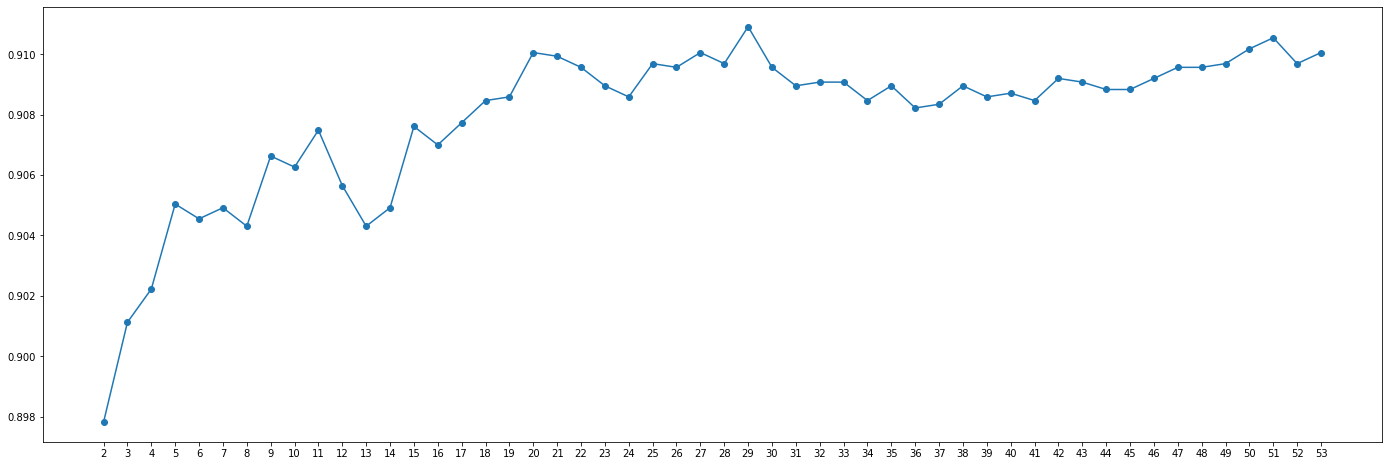

In [68]:
# display the results
plt.figure(figsize=(24,8))
plt.plot(range(2, 54), scores)
plt.scatter(range(2, 54), scores)
# plt.grid()
plt.xticks(range(2, 54))
plt.show()

In [69]:
print(f'\nMax accuracy = {(max(scores)*100)}%')


Max accuracy = 91.09153206069506%


In [70]:
stats.describe(scores)

DescribeResult(nobs=52, minmax=(0.8978218306412139, 0.9109153206069506), mean=0.9079149252607402, variance=6.595390179997094e-06, skewness=-1.8663448292891842, kurtosis=3.7161538610244342)

In [89]:
# Adding some other metrics to better analyze our models

acc_scores = []
roc_auc_scores = []
precision_scores = []
recall_scores = []

# remember the ending number for range is not inclusive
for k in range(2, 54):
    # output to let us know where we are
    print(f'Evaluating {k} clusters')
    
    # n_jobs=-1 will use all processors on your system
    model = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    acc_scores.append(accuracy_score(pred, y_test))
    roc_auc_scores.append(roc_auc_score(pred, y_test))
    precision_scores.append(precision_score(pred, y_test))
    recall_scores.append(recall_score(pred, y_test))

Evaluating 2 clusters
Evaluating 3 clusters
Evaluating 4 clusters
Evaluating 5 clusters
Evaluating 6 clusters
Evaluating 7 clusters
Evaluating 8 clusters
Evaluating 9 clusters
Evaluating 10 clusters
Evaluating 11 clusters
Evaluating 12 clusters
Evaluating 13 clusters
Evaluating 14 clusters
Evaluating 15 clusters
Evaluating 16 clusters
Evaluating 17 clusters
Evaluating 18 clusters
Evaluating 19 clusters
Evaluating 20 clusters
Evaluating 21 clusters
Evaluating 22 clusters
Evaluating 23 clusters
Evaluating 24 clusters
Evaluating 25 clusters
Evaluating 26 clusters
Evaluating 27 clusters
Evaluating 28 clusters
Evaluating 29 clusters
Evaluating 30 clusters
Evaluating 31 clusters
Evaluating 32 clusters
Evaluating 33 clusters
Evaluating 34 clusters
Evaluating 35 clusters
Evaluating 36 clusters
Evaluating 37 clusters
Evaluating 38 clusters
Evaluating 39 clusters
Evaluating 40 clusters
Evaluating 41 clusters
Evaluating 42 clusters
Evaluating 43 clusters
Evaluating 44 clusters
Evaluating 45 clust

In [104]:
acc_cols = {'Accuracy': acc_scores, 'AUC': roc_auc_scores,
           'Precision': precision_scores, 'Recall': recall_scores}
knn_df = pd.DataFrame(data=acc_cols)
knn_df.sort_values(by=['Accuracy'], ascending=False).head(3)

,Accuracy,AUC,Precision,Recall
27,0.910915,0.799633,0.480669,0.665702
49,0.910548,0.797658,0.483804,0.661429
48,0.910181,0.798341,0.471264,0.664212


Our optimal K for accuracy appears to be at K = 27.

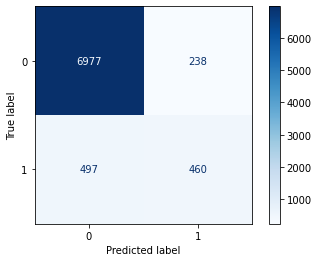

In [73]:
# View a confusion matrix to get a better idea of the prediction distribution considering the huge number of
# no's in our dataset

model = KNeighborsClassifier(n_neighbors=27)
model.fit(X_train, y_train)
plot_confusion_matrix(model, X_test, y_test, cmap='Blues')

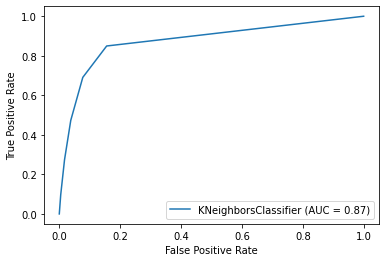

In [95]:
# Alternatively we can look at our ROC curve to compare the True Positive to the False Positive rate
# This may not be the ideal way of looking at it since we don't know the "cost" of our False Negative

plot_roc_curve(model, X_test, y_test)

- **What about accuracy rate?**

The optimal accuracy rate for our KNN is found at K = 27, and is just over 91%

In [114]:
knn_max = max(scores)*100
knn_max

91.09153206069506

- **Did we discover any insights from this analysis?**

In [116]:
# Determine accuracy lift from the niave classifier

knn_max - niave_acc

2.357379630326463

We found that our KNN, with K optimized for accuracy, is providing us about 2.4% increase in accuracy from an assumption that all future records will be a no as our predicted output. From here we can determine our performance by in a few different ways.

- **Discuss ways to improve the performance of your KNN model**

The KNN model that we have come up with optimized for accuracy is missing a few other components of evaluation when optimizing for performance. Ideally we would find the optimal K for True Positive, True Negative, False Positive and False Negative across all measures. We can improve these by doing k-folding cross-validation.

### Part 2: Compare another supervised learning algorithm

---

- **Compare to the KNN analysis**

- **Complete a K-fold cross-validation analysis for your improved model**

In order to compare to other algorithms we will go through three additional tests. The first will be comparing the KNN to a list of other classifiers. The second will be scaling the data using a pipeline and going through the classifiers again. Last we will compare to some ensemble methods and see how they score compared to KNN as well. We will also look at the confusion matrix and ROC curve to get a better idea of which methods do the best for overall performance.

In [75]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

In [76]:
num_folds = 5
seed = 42
scoring = 'accuracy'

In [77]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.910940 (0.001861)
LDA: 0.910451 (0.004001)
KNN: 0.903475 (0.002451)
CART: 0.892217 (0.002881)
NB: 0.866181 (0.003708)
SVM: 0.892767 (0.001029)


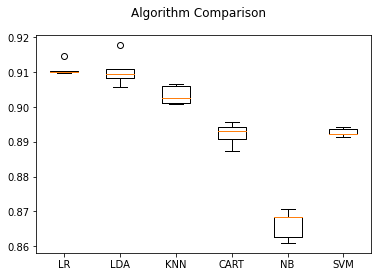

In [78]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Above is the the comparison between our models and their accuracy performance on the test data. It looks like our LDA model has the highest individual score, but it appears to be an outlier. The highest mean accuracy for our models using cross-validation comes from the Logistic Regression model.

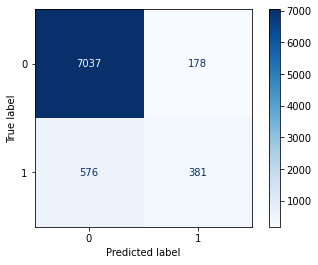

In [96]:
# Best of models suite (Logisitic Regression)

model = models[0][1]
model.fit(X_train, y_train)
plot_confusion_matrix(model, X_test, y_test, cmap='Blues')

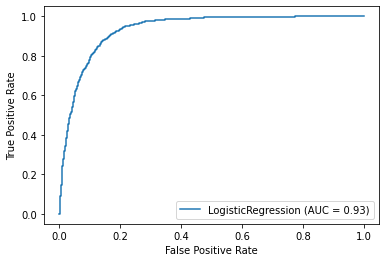

In [97]:
plot_roc_curve(model, X_test, y_test)

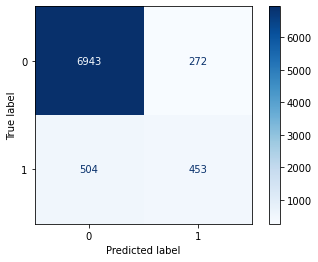

In [98]:
# Kfold KNN

model = models[2][1]
model.fit(X_train, y_train)
plot_confusion_matrix(model, X_test, y_test, cmap='Blues')

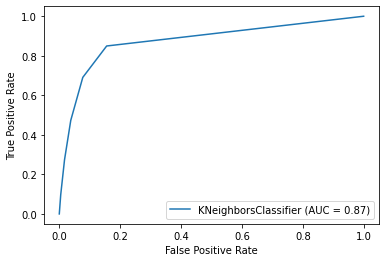

In [99]:
plot_roc_curve(model, X_test, y_test)

Comparing the ROC curve and the Confusion Matrix for both KNN and Logistic Regression shows the tradeoffs the we make between the two. It appears that our Logistic Regression has a better accuracy for True Negatives, whereas our KNN has the better accuracy for True Positives so depending on which is more important to the performance of the model we could pick which we would implement.

In [80]:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression(solver='liblinear'))])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC(gamma='auto'))])))

In [81]:
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: 0.911430 (0.002566)
ScaledLDA: 0.910451 (0.004001)
ScaledKNN: 0.898305 (0.002412)
ScaledCART: 0.891574 (0.003883)
ScaledNB: 0.392741 (0.239197)
ScaledSVM: 0.907942 (0.002468)


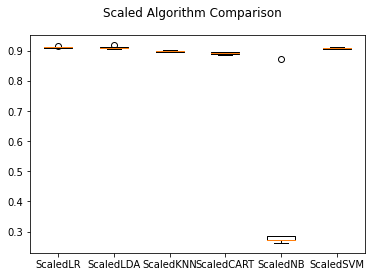

In [82]:
fig = plt.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

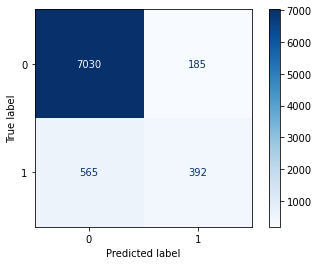

In [100]:
model = pipelines[0][1]
model.fit(X_train, y_train)
plot_confusion_matrix(model, X_test, y_test, cmap='Blues')

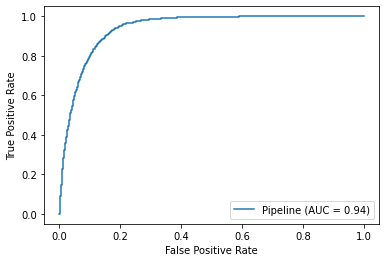

In [101]:
plot_roc_curve(model, X_test, y_test)

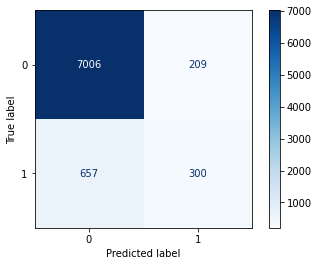

In [117]:
model = pipelines[2][1]
model.fit(X_train, y_train)
plot_confusion_matrix(model, X_test, y_test, cmap='Blues')

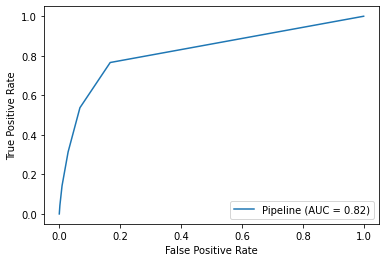

In [118]:
plot_roc_curve(model, X_test, y_test)

Once scaled we see that our Logistic Regression performs better on all values in the confusion matrix.

In [84]:
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier(n_estimators=10)))
ensembles.append(('ET', ExtraTreesClassifier(n_estimators=10)))

In [85]:
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

AB: 0.909135 (0.002213)
GBM: 0.917029 (0.001653)
RF: 0.906933 (0.001775)
ET: 0.899468 (0.002448)


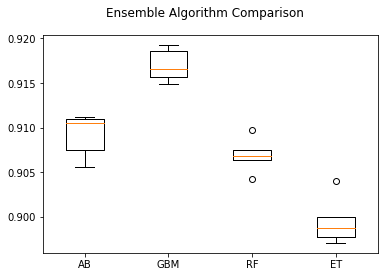

In [86]:
fig = plt.figure()
fig.suptitle('Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

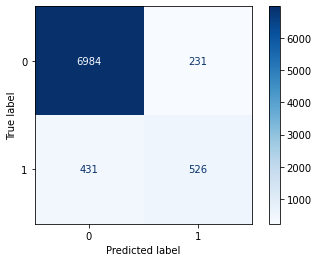

In [102]:
model = ensembles[1][1]
model.fit(X_train, y_train)
plot_confusion_matrix(model, X_test, y_test, cmap='Blues')

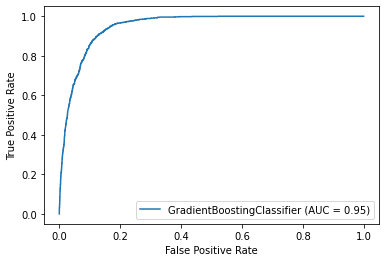

In [103]:
plot_roc_curve(model, X_test, y_test)

Comparing our Ensemble methods to the Scaled Linear Regression it looks like the best Ensemble (Gradient Boosting Classifier) it looks like our ensemble method is better in all categories except for False Positives. This means that once we refine our performance and come up with a cost function for the confusion matrix we could determine which implementation maximizes performance for us.

## V. Conclusion

From the above analysis we can conclude that our KNN classifier has an optimal K-value of 27, before K-fold cross validation we had an accuracy that was likely to be slightly overfit and calculated at just under 91.1% accuracy. When cross-validation was introduced to the process our accuracy drops to 90.3% accuracy, and when run through a standard scalar pipeline we lose much of our lift from the niave classifer to an accuracy of 89.8%. The niave classifier where we would just guess the mode of the term deposit subscribed column 'y' would give us an accuracy of 88.7%.

When looking at other supervised learning models we compared our KNN classifier to Logisitic Regression, Linear Discriminant Analysis, Decision Tree Classifier, Gaussian Niave Bayes, and Support Vector Classifier. The models were treated the same way as the KNN model and our best model after treatment was the Logisitic Regressing with an accuracy of 91.1%. Additionally, we tested four ensemble methods AdaBoost, Gradient Boosting Classifier, Random Forest Classifier, and the Extra Trees Classifier with the best model accuracy of 91.7% coming from the Gradient Boosting Classifier.

This solution could be further refined by creating a realistic cost function for the quadrants of our confusion matrix. This would weight our false postives, false negatives and true values. The weighted cost function could give us a better solution for practical performance.

## VI. References

MSDS 650 - Week 5 Content:


1.) __[From the Experts: Machine Learning](https://worldclass.regis.edu/d2l/le/content/285076/viewContent/4152306/View)__

2.) __[Week 5: Supervised Machine Learning](https://worldclass.regis.edu/d2l/le/content/285076/viewContent/4152301/View)__

3.) __[Week 5 Assignment](https://worldclass.regis.edu/d2l/le/content/285076/viewContent/4152299/View)__

[Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, In press, http://dx.doi.org/10.1016/j.dss.2014.03.001
 